In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("EastWestAirlines.csv")#, sep=';')
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
df.shape

(3999, 12)

In [4]:
#Descriptive statistics of the dataset:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID#,3999.0,2014.819455,1160.764358,1.0,1010.5,2016.0,3020.5,4021.0
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0


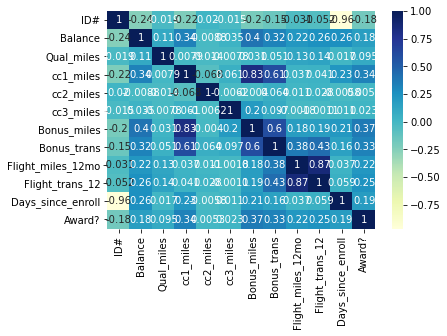

In [5]:
#Checking the correlation between the features:
import seaborn as sns
corr_plot = sns.heatmap(df.corr(),cmap='YlGnBu', annot=True)

In [6]:
#Checking the datatypes:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [7]:
#Checking for any missing values:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C3793A2D00>,
      dtype=object)

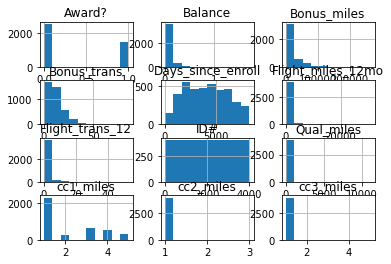

In [8]:
df.hist()

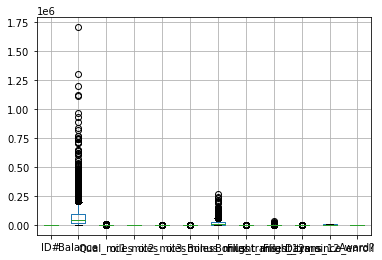

In [9]:
#Checking for any outliers:
df.boxplot()

In [10]:
#Dropping the ID column:
df_1 = df.drop(['ID#'], axis=1)
df_1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [12]:
#Normalising the data:
from sklearn.preprocessing import normalize
df_norm=pd.DataFrame(normalize(df_1),columns=df_1.columns)
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000


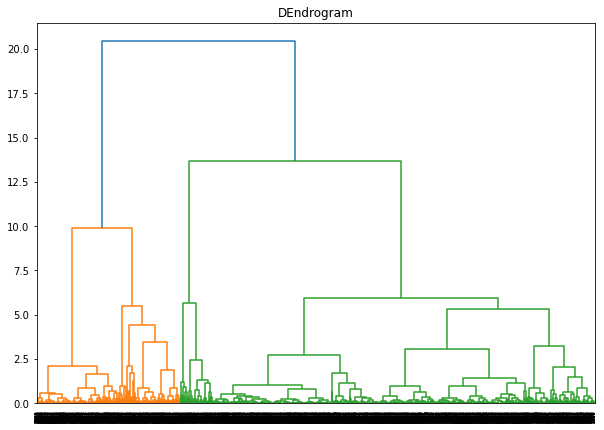

In [13]:
#Hierarchical clustering:
#First to plot dendrogram:
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,7))
plt.title("DEndrogram")
dend = sch.dendrogram(sch.linkage(df_norm, method='ward'))

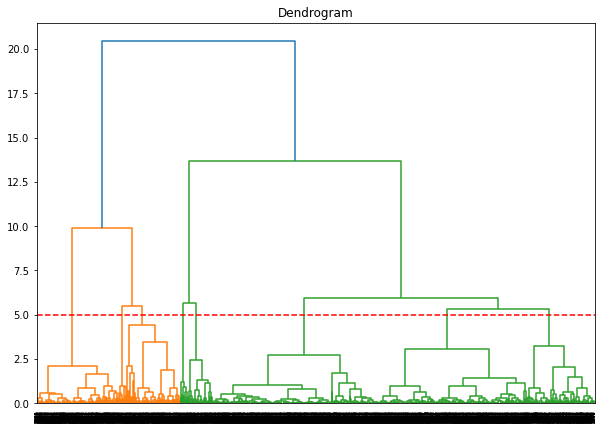

In [14]:
plt.figure(figsize=(10,7))
plt.title("Dendrogram")
dend = sch.dendrogram(sch.linkage(df_norm, method='ward'))
plt.axhline(y=5, color='r',linestyle='--')

In [15]:
#Hierarchical clustering to be applied for the above 2 clusters:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean',linkage='ward')
cluster.fit_predict(df_norm)

array([4, 2, 2, ..., 2, 4, 2], dtype=int64)

In [16]:
df['h_clusterid']=cluster.labels_

In [17]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,4
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,3
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,4
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,4


In [18]:
#DBSCAN:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN(eps=1, min_samples=5)
dbscan.fit(df_norm)

In [ ]:
dbscan.labels_

In [ ]:
#Adding the clusters to the dataset:
dbscan_df = pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [ ]:
dbscan_df.head()

In [ ]:
dbscan_df = pd.concat([df,dbscan_df],axis=1)

In [ ]:
dbscan_df.head()

In [ ]:
dbscan_df.groupby('cluster').aggregate(['mean']).reset_index()

In [ ]:
#KMEANS clustering:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [ ]:
#plotting the elbow curve to determine k:
import seaborn as sns
sns.set()

In [ ]:
wcss=[]
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(df_norm)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [ ]:
#From the plot, 4 cluster is selected:
model_kmeans = KMeans(n_clusters=4)
model_kmeans.fit(df_norm)
model_kmeans.labels_

In [ ]:
df_kmeans = pd.Series(model_kmeans.labels_)
df['Clust']=df_kmeans

In [ ]:
df.head()

In [ ]:
df.iloc[:,1:5].groupby(df.Clust).mean()